In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')




In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
response.status_code


400

In [4]:
#You have to use your API key to access the data!

MY_API_KEY = "spI_MF4tFqCx65dND029p6P19aN3Zwd3qYHDMsYrUaFa-55FroI4jdwMAtublbzcNSxR90mq29tDkMQQOZEvqmeVF6wRP8U8uVrVSzRiQLfo3hI87YWE9ht0t7kyX3Yx" # replace this with your API key!
client = Client(MY_API_KEY)


API_HOST = 'https://api.yelp.com/reviews'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'

url = 'https://api.yelp.com/v3/businesses/search'

params = {'term':'Restaurants', 
          'location': 'Westchester, NY',}

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

req = requests.get(url, params = params, headers = headers)

#shows its connecting
print('The status code is {}'.format(req.status_code))

#Print the data 

#json.loads(req.text)

The status code is 200


In [5]:
#clean and format the data 
resturants = req.text
resturants = json.loads(resturants)

In [6]:
# cleaning and exploring the data
for key in resturants.keys():
    print(key)

businesses
total
region


In [7]:
#examine the first element of businesses
resturants['businesses'][0].keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'price', 'location', 'phone', 'display_phone', 'distance'])

In [8]:
#turn each busines into a dataframe 
resturants_df = pd.DataFrame.from_dict(resturants['businesses'])
#resturants_df

In [9]:
#resturants_df[(resturants_df.groupby(['rating'] > 4)]['name'])['rating'][:10]]
                                               
#True false  
#resturants_df.loc[:,'rating'] > 4                                                                      
                              
#resturants_df[(resturants_df['rating'] > 4 & (resturants_df['review_count'] > 100))].sort_values(by = ['rating'], ascending = False)                                 
                                               
#resturants_df.head()                                           

In [10]:
resturants_df.drop(['id','alias','image_url','is_closed','url', 'coordinates','transactions','phone','distance'], axis = 1, inplace = True)


In [11]:
resturants_df[(resturants_df['rating'] > 4 & (resturants_df['review_count'] > 100))].sort_values(by = ['rating'], ascending = False)                                 


,name,review_count,categories,rating,price,location,display_phone
13,Dolphin South Trattoria,13,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,NaN,"{'address1': '39 Wheeler Ave', 'address2': '',...",
10,Bistro 146,107,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,$$$,"{'address1': '146 Bedford Rd', 'address2': Non...",(914) 495-3992
6,Indi-Q Indian Bistro & BBQ,90,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.5,$$,"{'address1': '61 Old Route 22', 'address2': No...",(914) 273-5931
18,The Turk,228,"[{'alias': 'turkish', 'title': 'Turkish'}]",4.5,$$,"{'address1': '20 S Moger Ave', 'address2': '',...",(914) 864-1900
17,Goosefeather,61,"[{'alias': 'cantonese', 'title': 'Cantonese'}]",4.5,NaN,"{'address1': '49 E Sunnyside Ln', 'address2': ...",(914) 829-5454
8,Blue Hill At Stone Barns,729,"[{'alias': 'newamerican', 'title': 'American (...",4.5,$$$$,"{'address1': '630 Bedford Rd', 'address2': Non...",(914) 366-9600
19,The Cube Inn,4,"[{'alias': 'cuban', 'title': 'Cuban'}, {'alias...",4.5,NaN,"{'address1': '22 Main St', 'address2': '', 'ad...",(914) 372-7974
9,Amore Pizzeria & Italian Kitchen,134,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,$$,"{'address1': '1 Kent Pl', 'address2': '', 'add...",(914) 273-3535
1,Casa Tequila Cocina & Bar,10,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,NaN,"{'address1': '465 Main St', 'address2': None, ...",(914) 219-5777
11,Village Social - Kitchen & Bar,358,"[{'alias': 'newamerican', 'title': 'American (...",4.0,$$,"{'address1': '251 E Main St', 'address2': '', ...",(914) 864-1255


In [12]:
#Visualize the data

import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
ax.plot(X, Y);

Y = resturants_df.groupby(['name']).review_count.mean()

#i think the second value is always the index of the other one but need to check 
X = Y.index



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

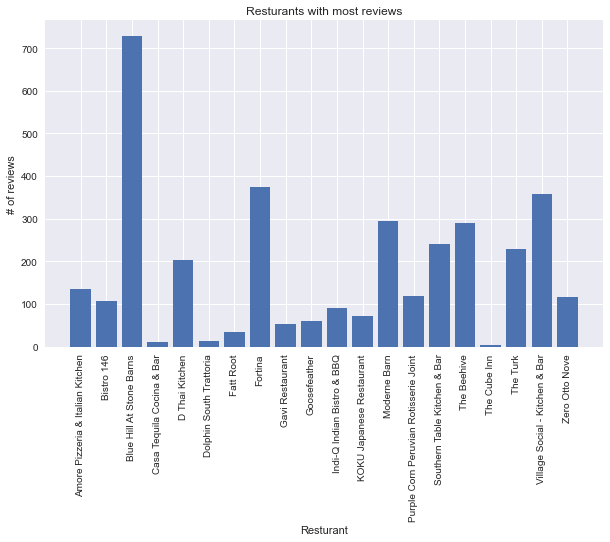

In [21]:
figure, ax = plt.subplots(figsize = (10,6))

ax.bar(X,Y)

ax.set_title('Resturants with most reviews')
ax.set_xlabel('Resturant')
ax.set_ylabel('# of reviews')
plt.xticks(rotation=90)